# <center> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготовливать данные для дальнейшего анализа и построения прогнозных моделей. Кокретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессиии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с преобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии теперь будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 5 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 6-15, 11-20, 16-25, 21-30).

Создадим неколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *csv_files_mask* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу X_sparse (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, *session_length* столбцов – индексам этих *session_length* сайтов и последний столбец – ID пользователя. 
- вектор y (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из X_sparse

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Замеряйте время выполнения итераций цикла с помощью time из time (или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress), [статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* на моем ноутбуке обработались примерно за 1 минуту, но многое, конечно, зависит от реализации функции и от используемого железа. 

In [2]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import pickle
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def matrix_to_sparse_matrix (matrix):
    """переводим обычную матрицу в разреженную матрицу 
    где 
    номер столбца это уникальное число из исходной матрицы от 1  до максимального значения в матрице
    значение в строке это сколько раз уникальное число встречалось в строке первоначальной матрицы"""
    print ('matrix_to_sparse_matrix')
    from scipy.sparse import csr_matrix
    
    NMZ = np.prod(np.array(matrix.shape)) # колличество элементов в matrix
    data = np.array([1]*NMZ)
    indptr = np.arange(0, NMZ+matrix.shape[1], matrix.shape[1])
    
    
    #print (len(matrix.reshape(-1)))
    return csr_matrix((data, matrix.reshape(-1), indptr))[:,1:]

In [3]:
def prepare_sparse_train_set_window(csv_files_mask, site_freq_path, session_length, window_size):
    '''
    input 
    csv_files_mask = dir of session files,
    site_freq_path = dir of dictionary,
    session_length = size of the session,
    window_size    = size of the window
    output 
    matrix - sparse matrix where rows are sessions, columns are frequentse indexes of site_id,
    y - target column is user_id (target)
    '''  
    print ('prepare_sparse_train_set_window')
    from glob import glob 
    
    data = pd.DataFrame(columns = None, dtype = np.int64)
    
    with open(site_freq_path ) as dic_pkl:
        dic =pickle.load(dic_pkl)    # dictionary where keys are site names values are (site_id, frequency of site_id)
    i = 1 # indicator of sites - site_id
    
    # from csv_files_mask to read all files
    for f in glob(csv_files_mask):
        df = pd.read_csv( f, header=None, names=['id', 'timestamp', 'site']) # make the dataframe from file
        # array with site_id  from dataframe now it is initialed  zeros length is multiple to the session_length
        ar = np.array([], dtype=np.int64)
        ar2 = np.array([], dtype = np.int64)
        
        for x in df.site:
            ar = np.append(ar, dic[x][0])
            
        N_rows = int(np.ceil(len(df)/float(window_size)))
        
        for i in range (N_rows+1):
            ar2 = np.append(ar2, ar[i*window_size : i*window_size + session_length ])
        
        ar2 = np.append(ar2,([0]*(N_rows*session_length - len(ar2))))
        ar2 = np.array(ar2).reshape((N_rows, session_length)) # convert array to matrix
        
        df1 = pd.DataFrame(ar2, columns = None, dtype = np.int64) # convert array to datafarme
        df1['target'] = df.id  # add target column
        
        data = data.append(df1) # add dataframe from next file  in dir csv_files_mask
        #print (data.shape)
    sparse_matrix = matrix_to_sparse_matrix (data.values[:,:-1])
    #print (sparse_matrix.shape)
    #print ('**********************************')
    return sparse_matrix, data.target.values

**Примените полученную функцию с параметрами session_length=5 и window_size=3 к игрушечному примеру. Убедитесь, что все работает как надо.**

In [4]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window('capstone_websites_data/3users_toy/*', 
                                                       'capstone_websites_data/site_freq_3users.pkl',
                                       session_length=5, window_size=3)

prepare_sparse_train_set_window
matrix_to_sparse_matrix


In [5]:
X_toy_s5_w3.shape

(12, 11)

In [6]:
X_toy_s5_w3.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра session_length (15, 10, 7 или 5) и значениям параметра window_size (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы 'capstone_websites_data/X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl' и 'capstone_websites_data/y_{num_users}users_s{session_length}_w{window_size}.pkl'.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список data_lengths число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 34 минуты, хотя понятно, что все зависит от эффективности реализации функции prepare_sparse_train_set_window и мощности используемого железа. **

In [7]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    print (" ")
    print ('ВЫПОЛНИМ ПРОХОД ПО  {0} ПОЛЬЗОВАТЕЛЯМ'.format(num_users))
    print (" ")
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            print ('window_size {0}, session_length {1}'.format(window_size, session_length))
            X_sparse, y = prepare_sparse_train_set_window('capstone_websites_data/{0}users/*'.format(num_users), 
                                    'capstone_websites_data/site_freq_{0}users.pkl'.format(num_users),
                                       session_length , window_size )
            
            
            
            data_lengths.append( X_sparse.shape[0])
            print ("*********************")
            print (data_lengths)
            print (" ")
        
            file_X = 'capstone_websites_data/Xsparse{0}users_s{1}_w{2}.pkl'.format(num_users,session_length, window_size)
            with open( file_X,'wb')   as X_pkl:
                pickle.dump(X_sparse, X_pkl)
            
            file_y = 'capstone_websites_data/y{0}users_s{1}_w{2}.pkl'.format(num_users, session_length, window_size)
            with open( file_y,'wb')   as y_pkl:
                pickle.dump(y, y_pkl)
                            

ВЫПОЛНИМ ПРОХОД ПО  10 ПОЛЬЗОВАТЕЛЯМ
window_size 10, session_length 15
prepare_sparse_train_set_window
matrix_to_sparse_matrix
*********************
[14061]
window_size 7, session_length 15
prepare_sparse_train_set_window
matrix_to_sparse_matrix
*********************
[14061, 20087]
window_size 7, session_length 10
prepare_sparse_train_set_window
matrix_to_sparse_matrix
*********************
[14061, 20087, 20087]
window_size 7, session_length 7
prepare_sparse_train_set_window
matrix_to_sparse_matrix
*********************
[14061, 20087, 20087, 20087]
window_size 5, session_length 15
prepare_sparse_train_set_window
matrix_to_sparse_matrix
*********************
[14061, 20087, 20087, 20087, 28118]
window_size 5, session_length 10
prepare_sparse_train_set_window
matrix_to_sparse_matrix
*********************
[14061, 20087, 20087, 20087, 28118, 28118]
window_size 5, session_length 7
prepare_sparse_train_set_window
matrix_to_sparse_matrix
*********************
[14061, 20087, 20087, 20087, 28118

**Запишите в файл *answer2_1.txt* все числа из списка data_lengths через пробел. Полученный файл будет ответом на 1 вопрос теста.**

In [8]:
def write_answer_to_file(answer, file_address):
    with open(file_address, 'w') as out_f:
        out_f.write(str(answer))

In [11]:
[str(x) for x in  data_lengths]

['14061',
 '20087',
 '20087',
 '20087',
 '28118',
 '28118',
 '28118',
 '28118',
 '137019',
 '195712',
 '195712',
 '195712',
 '273957',
 '273957',
 '273957',
 '273957']

In [12]:
' '.join([str(x) for x in  data_lengths])

'14061 20087 20087 20087 28118 28118 28118 28118 137019 195712 195712 195712 273957 273957 273957 273957'

In [13]:
write_answer_to_file(' '.join([str(x) for x in  data_lengths]), 'answer2_1.txt')

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл train_data_10users.csv. Далее будем работать с ним.**

In [3]:
train_df = pd.read_csv('capstone_websites_data/train_data_10users.csv', 
                       index_col='session_id')

In [4]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
session_id,,,,,,,,,,,
0,1,2,2,3,4,5,6,7,8,7,31
1,7,8,7,7,9,10,11,12,13,14,31
2,7,15,16,17,17,8,17,17,10,3,31
3,18,19,20,17,21,17,17,17,17,22,31
4,23,24,25,17,26,27,28,29,30,31,31


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1     14061 non-null int64
site2     14061 non-null int64
site3     14061 non-null int64
site4     14061 non-null int64
site5     14061 non-null int64
site6     14061 non-null int64
site7     14061 non-null int64
site8     14061 non-null int64
site9     14061 non-null int64
site10    14061 non-null int64
target    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [6]:
train_df['target'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: target, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [7]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] for i in range(train_df.shape[0])]

In [8]:
pd.Series(num_unique_sites).value_counts()

6     2248
7     2247
5     1877
8     1769
2     1506
4     1298
9     1101
3     1088
1      500
10     427
dtype: int64

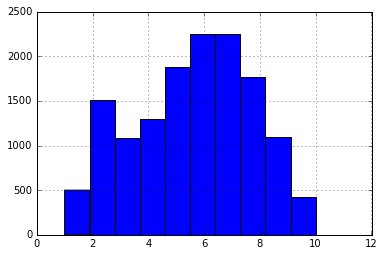

In [9]:
pd.Series(num_unique_sites).hist()

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответ на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

((array([-3.89403843, -3.6734386 , -3.55253248, ...,  3.55253248,
          3.6734386 ,  3.89403843]),
  array([ 1,  1,  1, ..., 10, 10, 10], dtype=int64)),
 (2.2967736980257403, 5.6113363203186113, 0.97870134689987542))

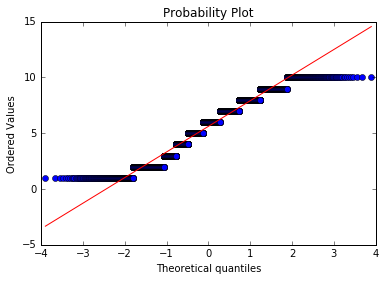

In [10]:
stats.probplot(num_unique_sites, dist="norm", plot=pylab)

In [11]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %e" % stats.shapiro(num_unique_sites))

Shapiro-Wilk normality test, W-statistic: 0.957596, p-value: 0.000000e+00


In [12]:
W_statistic, p_value  = stats.shapiro(num_unique_sites)
if  p_value > 0.05 :
    norm = 'YES'
else:
    norm = 'NO'

In [13]:
def write_answer_to_file(answer, file_address):
    with open(file_address, 'w') as out_f:
        out_f.write(str(answer))

In [14]:
write_answer_to_file(norm, 'answer2_2.txt')

In [15]:
norm

'NO'

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сесии из 10 сайтов. Конкретно, проверьте с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет порядок полученного p-value (напрмиер, если p=2.3e-4, то ответ будет -4).**

In [19]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [20]:
has_two_similar.sum(), len(has_two_similar)

(13634, 14061)

In [21]:
p_value = stats.binom_test(has_two_similar.sum(), n =len(has_two_similar), p= 0.95, alternative = 'greater') 
p_value

1.0857838784326601e-30

In [22]:
floor(log10(p_value)), floor(log10(2e12))

(-30.0, 12.0)

In [23]:
write_answer_to_file(floor(log10(p_value)), 'answer2_3.txt')

**Постройте для этой доли доверительный интервал Уилсона. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_4.txt*. Это будет ответов на 4 вопрос теста.**

In [24]:
wilson_interval = proportion_confint( sum(has_two_similar), len(has_two_similar), method ='wilson')
print ('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.966665, 0.972343] with width 0.005678


In [25]:
write_answer_to_file('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)), 'answer2_4.txt')

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [34]:
site_freqs = np.unique(train_df.values[:, :-1], return_counts = True)

In [28]:
site_freqs1000 = site_freqs[1] [site_freqs [1] > 1000]
len(site_freqs1000)

25

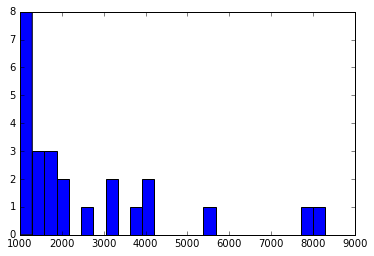

In [30]:
plt.hist(site_freqs1000, bins = 25)
plt.show()

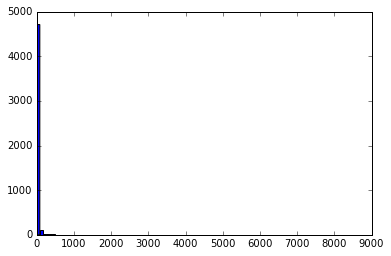

In [31]:
plt.hist(site_freqs[1], bins = 100)
plt.show()

In [32]:
with open('capstone_websites_data/site_freq_10users.pkl' ) as dic_pkl:
        dic =pickle.load(dic_pkl)    # dictionary where keys are site names values are (site_id, frequency of site_id)

In [37]:
site_freqs_ = dic.values()
site_freqs_[:10]

[(3317, 1),
 (3659, 2),
 (4128, 2),
 (1, 40),
 (2570, 3),
 (811, 2),
 (2568, 34),
 (4400, 1),
 (4314, 5),
 (30, 3)]

In [38]:
len(site_freqs_), len(site_freqs[1])

(4913, 4914)

In [40]:
site_freqs[0][:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

**Постройте доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для 1000 самых частых) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [42]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [43]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [51]:
n_site = len(site_freqs[1])-1
bootstrap_sample = get_bootstrap_samples (site_freqs[1][1:], n_site)
bootstrap_sample.shape

(4913L, 4913L)

In [50]:
bootstrap_sample.mean(axis =1).shape

(1000L,)

In [55]:
interval_b = stat_intervals(bootstrap_sample.mean(axis =1), 0.05)
print ("95% confidence interval:",  interval_b)

95% confidence interval: [ 22.42259312  35.80891512]


In [60]:
write_answer_to_file('{} {}'.format(round( interval_b[0], 3), round( interval_b[1], 3)) , 'answer2_5.txt')

## Пути улучшения
В этом проекте свобода творчества на каждом шаге, а 7 неделя проекта посвящена общему описанию (.ipynb или pdf) и взаимному оцениванию проектов. Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длина сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/identify-me-if-you-can2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.